In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [34]:
def read_file(file_name):
    data = pd.read_csv(file_name)
    return data

In [35]:
training_data = read_file('train.csv')
training_data.head(5)
training_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
#getting all columns having null values
columns_with_null = training_data.columns[training_data.isnull().any()]
null_counts = training_data[columns_with_null].isnull().sum()
null_counts

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [37]:
#Removing null values from categorical columns and replacing them with mode
def categorical_data(data):
    categorical_columns = data.select_dtypes(include=['category', 'object']).columns
    for column in categorical_columns:
        mode_category = data[column].mode()[0]
        data[column].fillna(mode_category, inplace=True)
    return data

In [38]:
#Removing null values from numerical columns and replacing them with mean
def numerical_data(data):
    numerical_columns = numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns:
        mean_numerical = data[column].mean()
        data[column].fillna(mean_numerical, inplace=True)
    return data

In [39]:
data = categorical_data(training_data)
data = numerical_data(data)
columns_with_null = data.columns[data.isnull().any()]
null_counts = data[columns_with_null].isnull().sum()
null_counts
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [40]:
def label_encode_categorical(data):
    label_encoders = {}
    categorical_columns = data.select_dtypes(include=['category', 'object']).columns
    for column in categorical_columns:
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])
        label_encoders[column] = label_encoder
    return data

In [41]:
train = label_encode_categorical(data)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,8,4,142125


In [42]:
def standardize(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [43]:
target = train['SalePrice']
column_name = 'SalePrice'
train = train.drop(column_name, axis=True)
train.shape

(1460, 80)

In [44]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train, target, test_size=0.2, random_state=42)

In [45]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
feature_importance = model.feature_importances_

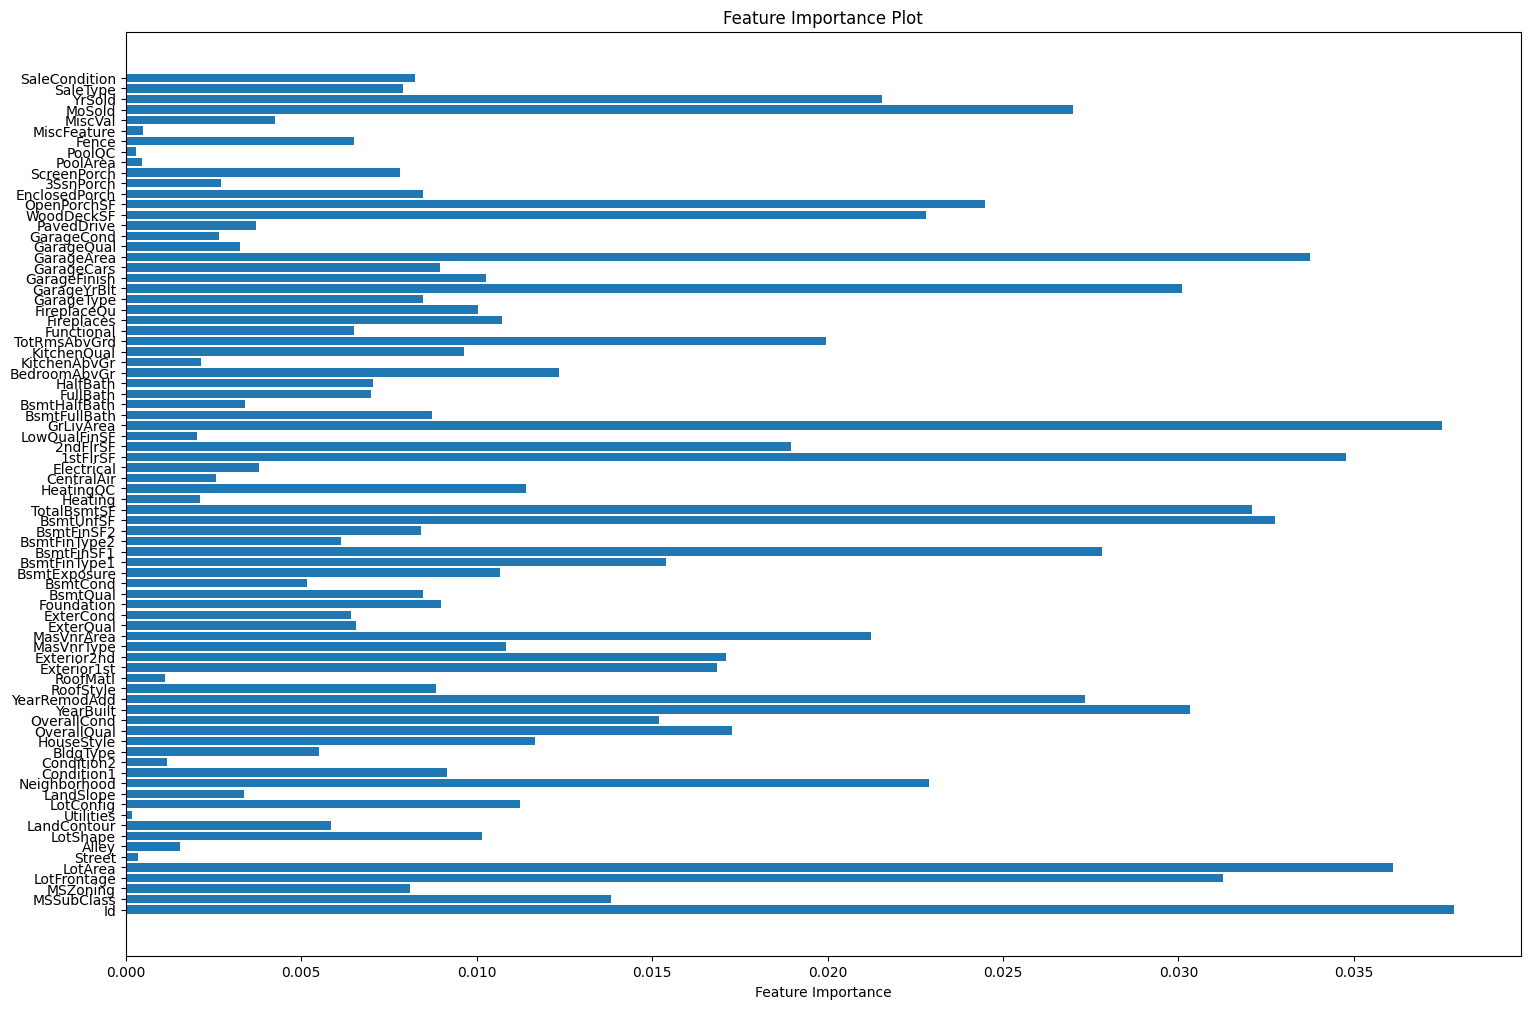

In [46]:
#plotting feature importance using random forest
feature_names = X_train.columns 
plt.figure(figsize=(18, 12))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

In [47]:
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, Y_train)
coefficients = lasso_model.coef_

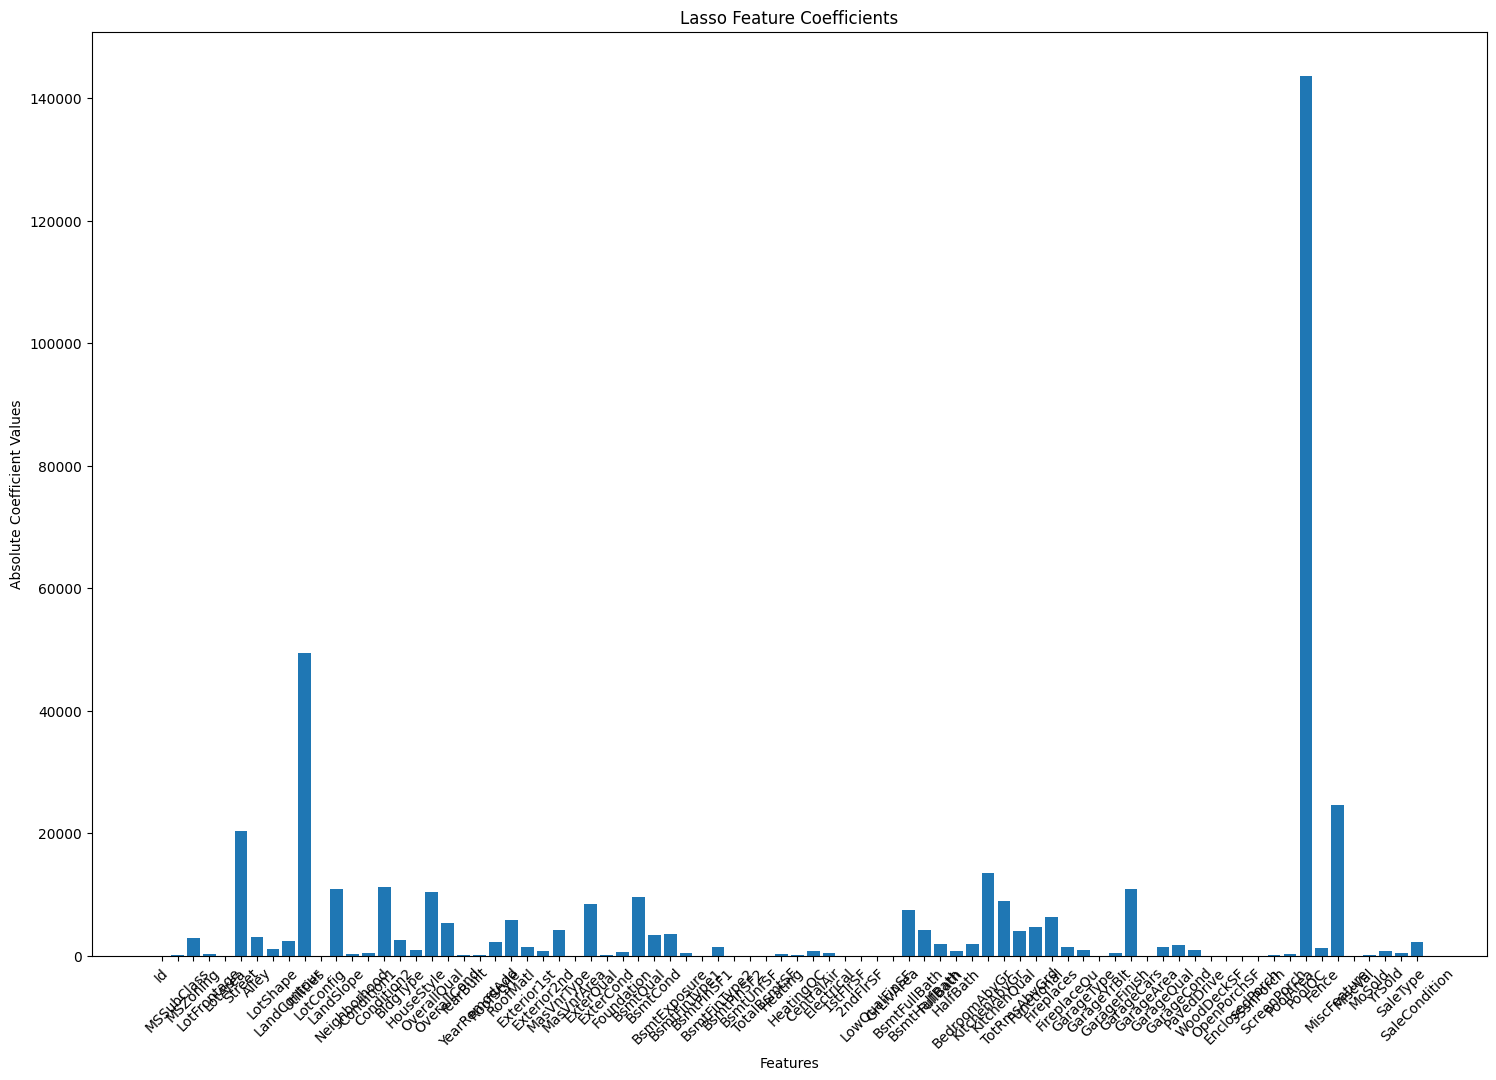

In [48]:
# Create a bar chart to visualize the feature coefficients
lasso_coefficients = np.abs(lasso_model.coef_)
plt.figure(figsize=(18, 12))
plt.bar(X_train.columns, lasso_coefficients)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Values')
plt.title('Lasso Feature Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [49]:
alpha = 0.01
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.01)

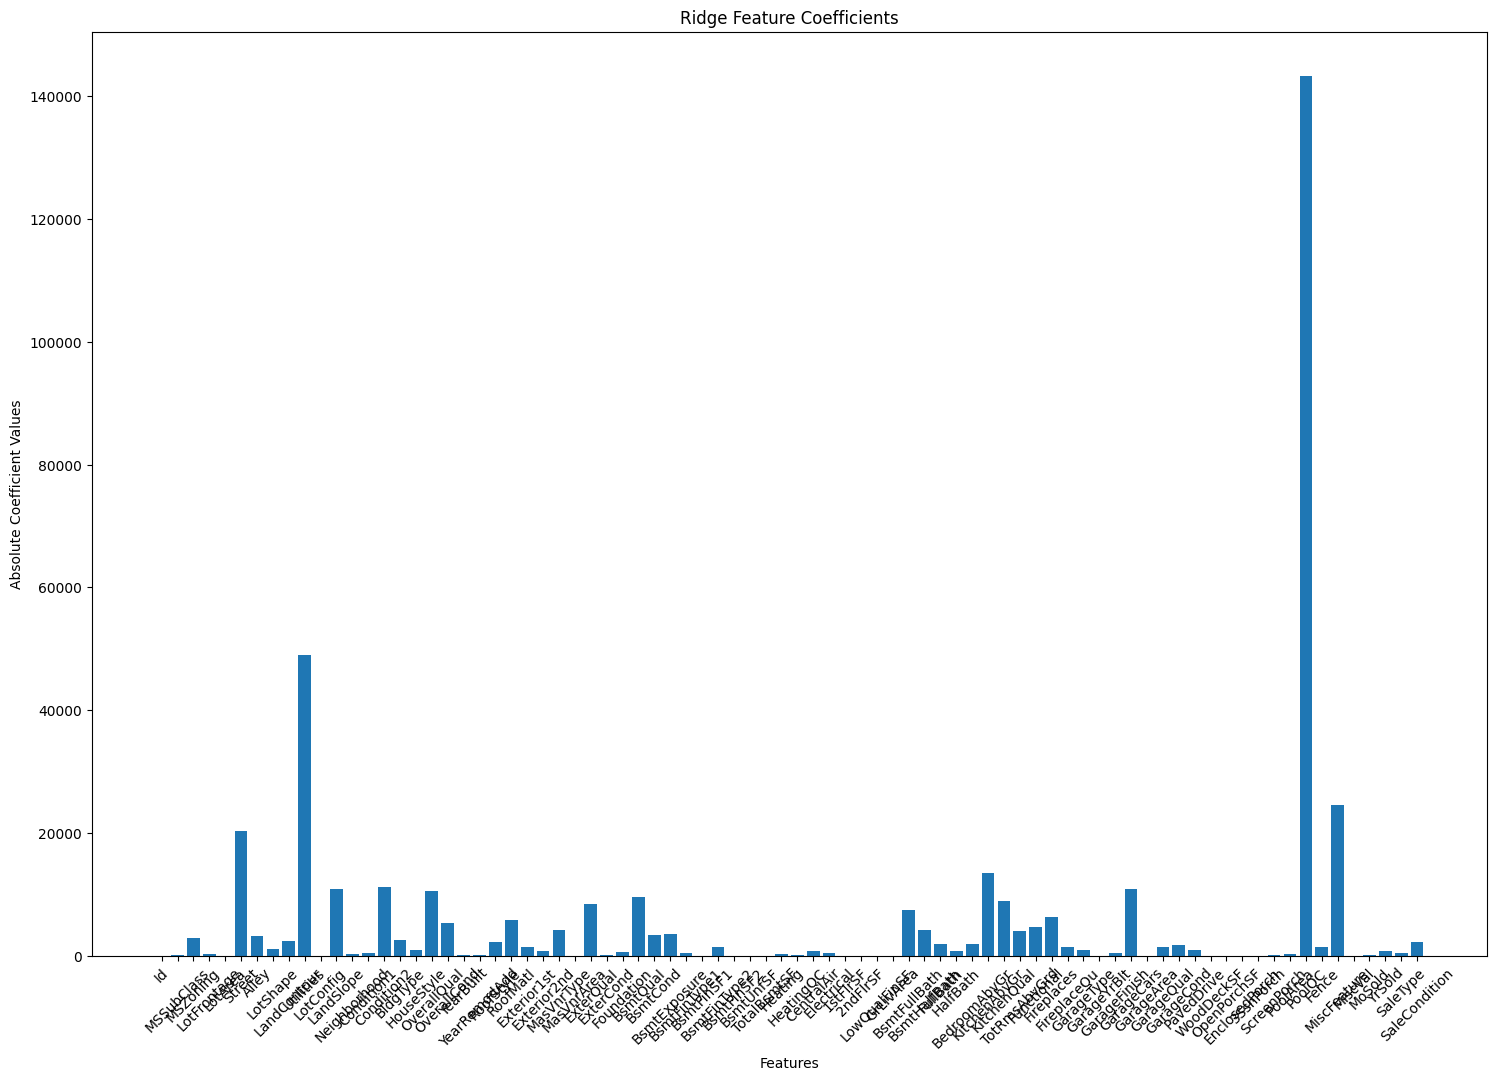

In [50]:
# Create a bar chart to visualize the feature coefficients
ridge_coefficients = np.abs(ridge_model.coef_)
plt.figure(figsize=(18, 12))
plt.bar(X_train.columns, ridge_coefficients)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Values')
plt.title('Ridge Feature Coefficients')
plt.xticks(rotation=45)
plt.show()

In [82]:
ridge_coefficients = ridge_model.coef_
threshold = 5.0
selected_columns = train.columns[np.abs(ridge_coefficients) > threshold]
reduced_X_train = X_train[selected_columns]
reduced_X_Valid = X_valid[selected_columns]
reduced_X_train.head(5)

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
254,20,3,70.0,1,0,3,3,0,4,0,...,0,0,0,2,2,2,6,2010,8,4
1066,60,3,59.0,1,0,0,3,0,4,0,...,0,0,0,2,2,2,5,2009,8,4
638,30,3,67.0,1,0,3,3,0,4,0,...,0,0,0,2,2,2,5,2008,8,4
799,50,3,60.0,1,0,3,3,0,0,0,...,0,0,0,2,2,2,6,2007,8,4
380,50,3,50.0,1,1,3,3,0,4,0,...,0,0,0,2,2,2,5,2010,8,4


In [83]:
X_train_std = standardize(reduced_X_train)
X_valid_std = standardize(reduced_X_Valid)
X_train_std.shape

(1168, 72)

In [84]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)
xgb_model.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [85]:
predictions_val = xgb_model.predict(X_valid_std)
r2 = r2_score(Y_valid, predictions_val)
print("R2_score for validation is :", r2)

R2_score for validation is : 0.8899124711291696


In [86]:
test_data = read_file('test.csv')
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [87]:
#doing all feature operations on test data
test_data1 = categorical_data(test_data)
test = numerical_data(test_data1)
test_hot_encoded = label_encode_categorical(test)
ridge_coefficients = np.abs(ridge_model.coef_)
ridge_coefficients = ridge_model.coef_
threshold = 5.0
selected_columns = train.columns[np.abs(ridge_coefficients) > threshold]
reduced_X_test = test_hot_encoded[selected_columns]
test_std = standardize(reduced_X_test)
test_predction = xgb_model.predict(test_std)

In [88]:
#creating a dataframe and saving the dataset as a csv file
Id = test_data.Id
prediction_data = {'Id':Id, 'SalePrice':test_predction}
df = pd.DataFrame(prediction_data)
file_path = 'Housing_Price_Advance_Regression_Predictions'
df.to_csv(file_path, index=False)
print(f'Dataframe saved as csv to: {file_path}')

Dataframe saved as csv to: Housing_Price_Advance_Regression_Predictions
